# Домашнее задание

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
1. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
1. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
1. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
1. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
1. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
1. Формирование обучающей и тестовой выборок на основе исходного набора данных.
1. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
1. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
1. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
1. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# Проведение разведочного анализа данных

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# Подключаем встроенные графики
%matplotlib inline

# Изменин формат сохранения графиков для улучшения отображения
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
#Подлючаем данные
data = pd.read_csv('SolarPrediction.csv', sep=",")

In [4]:
#Преобразуем временные колонки в соответствующий временной формат:
data["Time"] = (pd
                    .to_datetime(data["UNIXTime"], unit="s", utc=True)
                    .dt.tz_convert("Pacific/Honolulu")).dt.time

data["TimeSunRise"] = (pd
                       .to_datetime(data["TimeSunRise"],
                                    infer_datetime_format=True)
                       .dt.time)

data["TimeSunSet"] = (pd
                      .to_datetime(data["TimeSunSet"],
                                   infer_datetime_format=True)
                      .dt.time)

data = data.rename({"WindDirection(Degrees)": "WindDirection"},
                   axis=1)

In [5]:
# Список колонок с типами данных
data.dtypes

UNIXTime           int64
Data              object
Time              object
Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
TimeSunRise       object
TimeSunSet        object
dtype: object

In [6]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [7]:
def time_to_second(t):
    return ((datetime.combine(datetime.min, t) - datetime.min)
            .total_seconds())

In [8]:
df = data.copy()

timeInSeconds = df["Time"].map(time_to_second)

sunrise = df["TimeSunRise"].map(time_to_second)
sunset = df["TimeSunSet"].map(time_to_second)
df["DayPart"] = (timeInSeconds - sunrise) / (sunset - sunrise)

df = df.drop(["UNIXTime", "Data", "Time",
              "TimeSunRise", "TimeSunSet"], axis=1)

df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
0,1.21,48,30.46,59,177.39,5.62,1.475602
1,1.21,48,30.46,58,176.78,3.37,1.468588
2,1.23,48,30.46,57,158.75,3.37,1.461713
3,1.21,48,30.46,60,137.71,3.37,1.454653
4,1.17,48,30.46,62,104.95,5.62,1.447778


In [9]:
df.dtypes

Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
DayPart          float64
dtype: object

In [10]:
df.shape

(32686, 7)

In [11]:
# Основные статистические характеристики
df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,0.482959
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.602432
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,-0.634602
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,-0.040139
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,0.484332
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,1.006038
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1.566061


In [12]:
# Проверка на наличие пропусков
df.isnull().sum()

Radiation        0
Temperature      0
Pressure         0
Humidity         0
WindDirection    0
Speed            0
DayPart          0
dtype: int64

## Визуальное исследование датасета

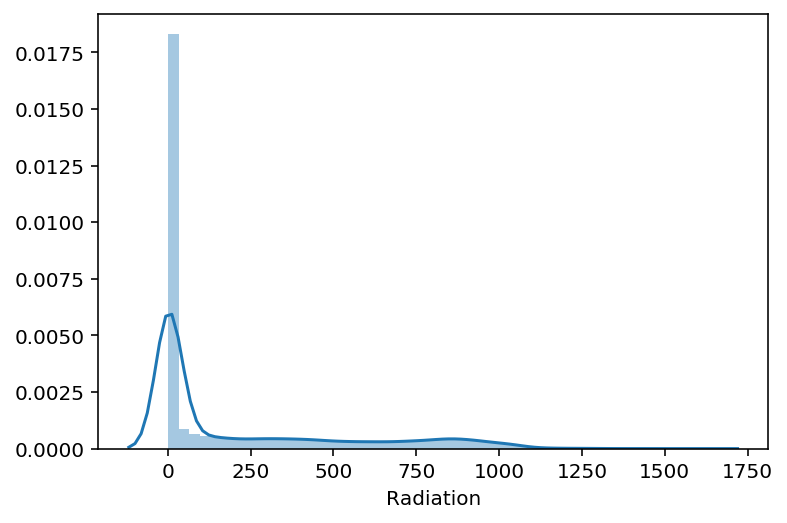

In [13]:
# Оценка распределения целевого признака
sns.distplot(df["Radiation"]);

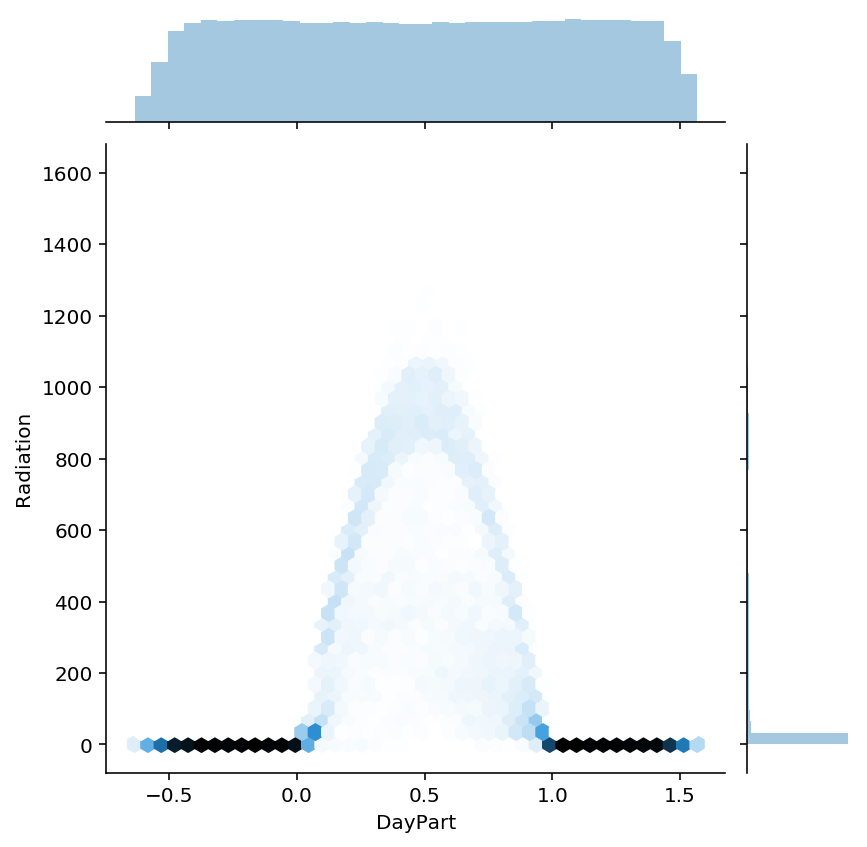

In [14]:
#Зависимость Радиации от наличия солнца в небе
sns.jointplot(x="DayPart", y="Radiation", data=df, kind="hex");

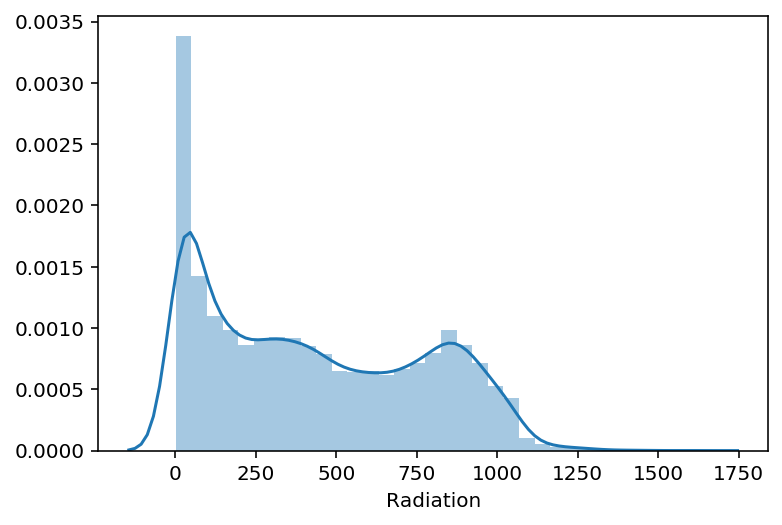

In [15]:
#Мощность излучения в течение дня
dfd = df[(df["DayPart"] >= 0) & (df["DayPart"] <= 1)]
sns.distplot(dfd["Radiation"]);

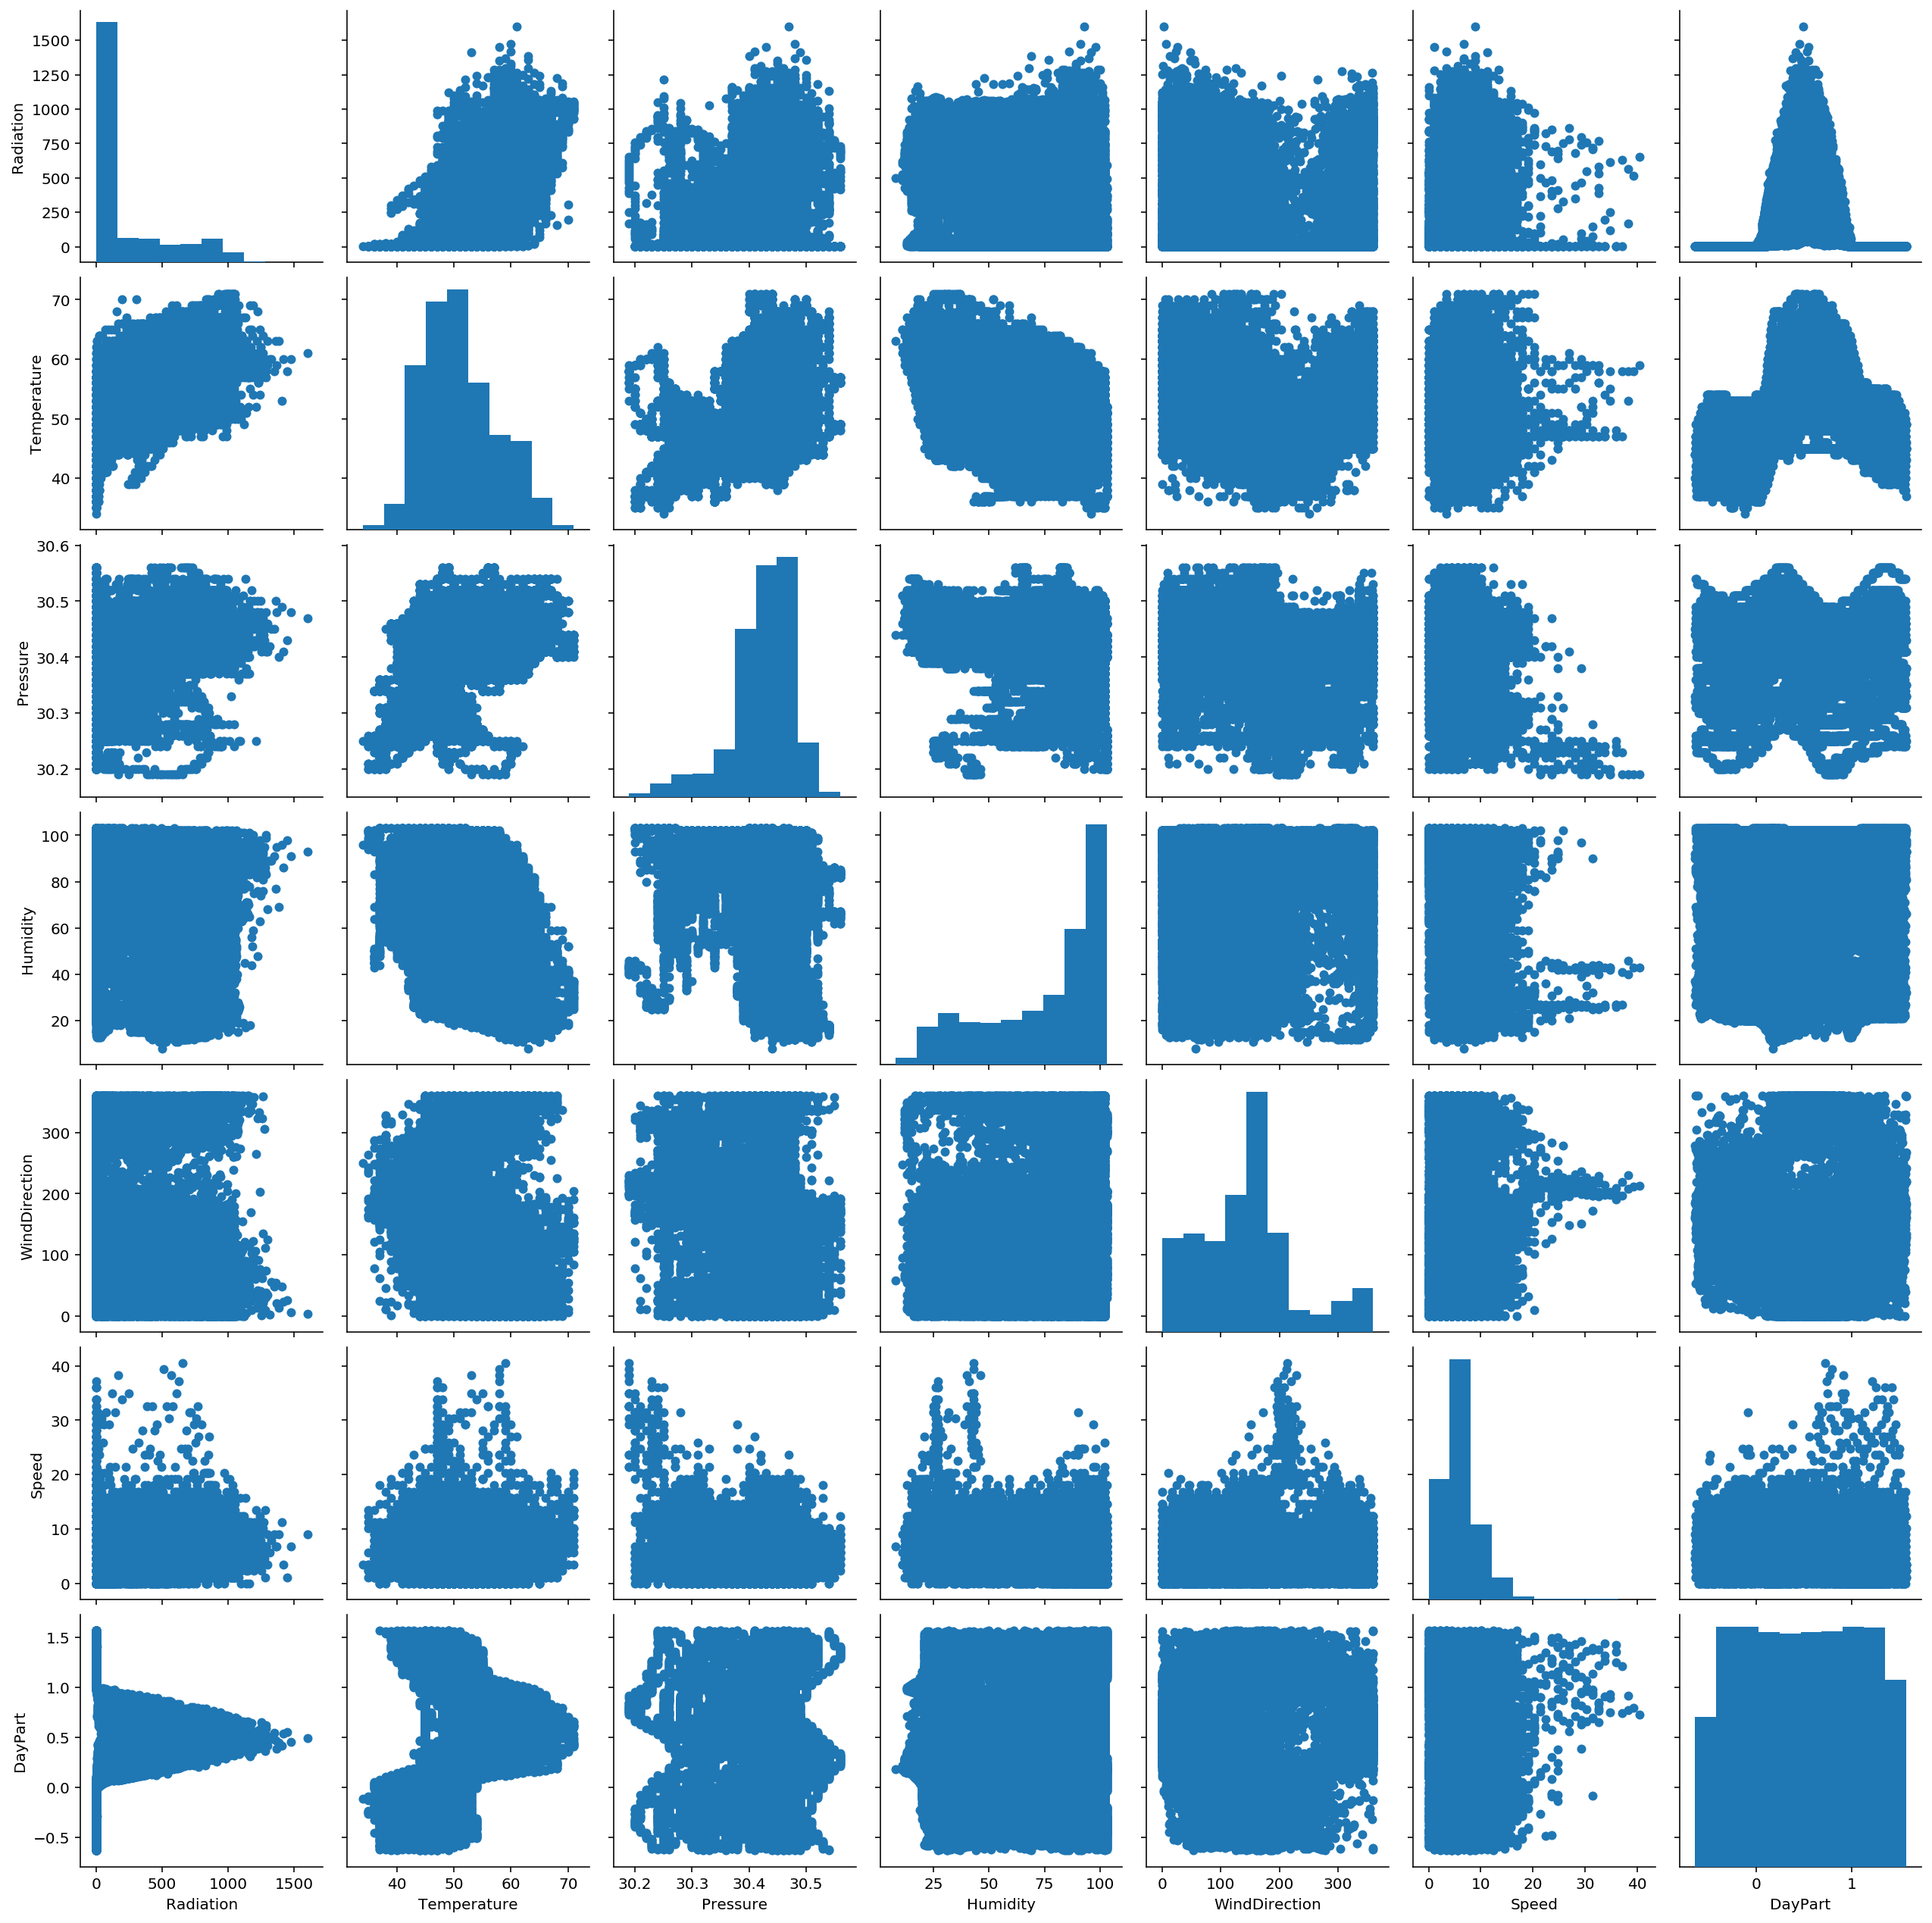

In [16]:
#Парные диаграммы
sns.pairplot(df, plot_kws=dict(linewidth=0));

Видно, что зависимости между колонками весьма сложные и в большинстве своём нелинейные. Какого-то показателя, точно определяющего мощность излучения, не наблюдается. Вместе с тем чётко видно, что время суток ограничивает мощность излучения сверху, что вполне может быть полезно для модели машинного обучения.

## Корреляционный анализ

In [17]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,0.005980
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,0.198520
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,0.094403
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,0.075513
WindDirection,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,-0.078130
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,-0.056095
DayPart,0.005980,0.198520,0.094403,0.075513,-0.078130,-0.056095,1.000000


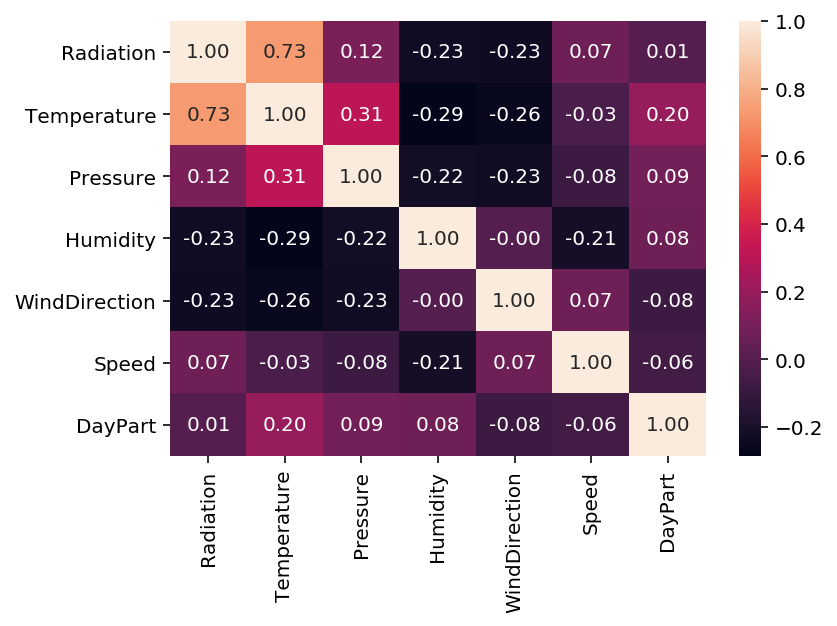

In [18]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

Видно, что мощность солнечного излучения заметно коррелирует с температурой, что было показано выше с помощью парного графика. Остальные признаки коррелируют друг с другом довольно слабо.

# Подготовка данных для обучения моделей

In [19]:
#Разделим на целевой столбец и признаки
X = df.drop("Radiation", axis=1)
y = df["Radiation"]

print(X.head(), "\n")
print(y.head())

   Temperature  Pressure  Humidity  WindDirection  Speed   DayPart
0           48     30.46        59         177.39   5.62  1.475602
1           48     30.46        58         176.78   3.37  1.468588
2           48     30.46        57         158.75   3.37  1.461713
3           48     30.46        60         137.71   3.37  1.454653
4           48     30.46        62         104.95   5.62  1.447778 

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64


In [20]:
print(X.shape)
print(y.shape)

(32686, 6)
(32686,)


In [21]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
count,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04
mean,5.565041e-16,2.904952e-14,1.391260e-17,6.956302e-17,-9.738822e-17,5.217226e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.758117e+00,-4.259540e+00,-2.578560e+00,-1.724255e+00,-1.788859e+00,-1.855112e+00
25%,-8.229646e-01,-4.184734e-01,-7.316829e-01,-7.366250e-01,-8.233591e-01,-8.683240e-01
50%,-1.779139e-01,1.302504e-01,3.841386e-01,5.062367e-02,-1.787376e-01,2.279483e-03
75%,6.283995e-01,6.789742e-01,8.458578e-01,4.307058e-01,4.658840e-01,8.682924e-01
max,3.208603e+00,2.508053e+00,1.076717e+00,2.602741e+00,9.814329e+00,1.797910e+00


## Выбор метрик

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

#Функция, которая считает метрики построенной модели
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Формирование обучающей и тестовой выборок

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24514, 6)
(8172, 6)
(24514,)
(8172,)


# Построение базового решения

### Метод k ближайших соседей

In [26]:
#C гиперпараметром k=5
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
test_model(knn_5)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


### Дерево решений

In [28]:
#С неограниченной глубиной
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
test_model(dt_none)

mean_absolute_error: 49.394926578560934
median_absolute_error: 0.7249999999999523
r2_score: 0.837394846291527


### Случайный лес

In [30]:
#С гиперпараметром n=100:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
test_model(ran_100)

mean_absolute_error: 37.9442242657856
median_absolute_error: 0.6369000000000611
r2_score: 0.9154556610041328


# Подбор гиперпараметров

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

### Метод k ближайших соседей

In [33]:
#Cписок настраиваемых параметров
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [34]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

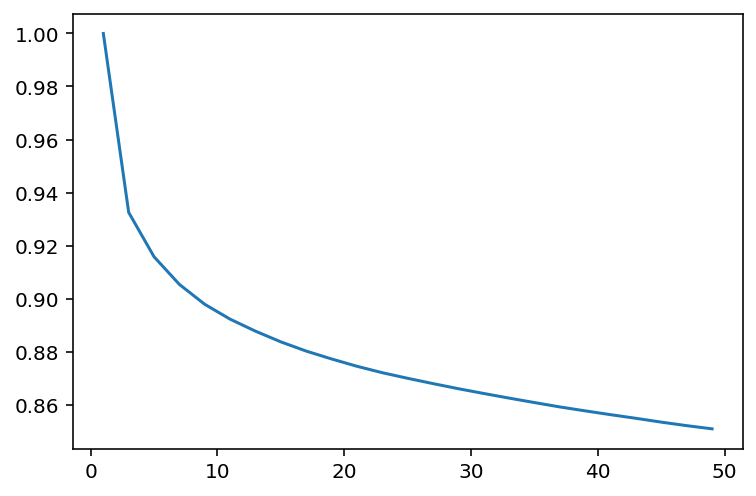

In [35]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

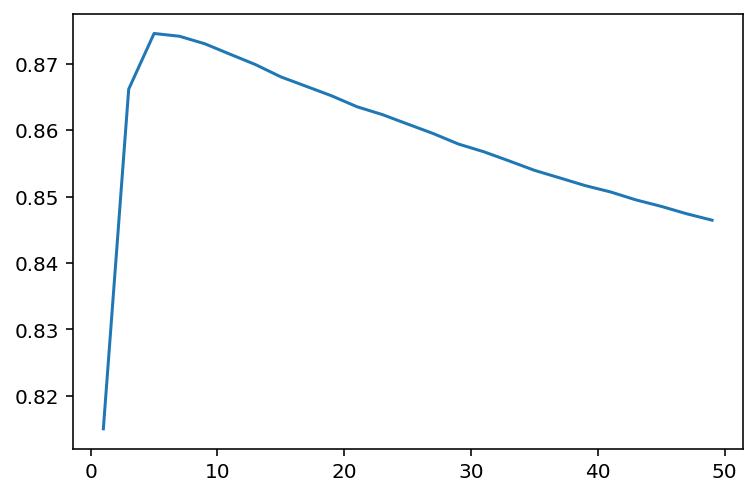

In [36]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [37]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


In [48]:
test_model(knn_5)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


### Дерево решений

In [38]:
#Cписок настраиваемых параметров
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [39]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

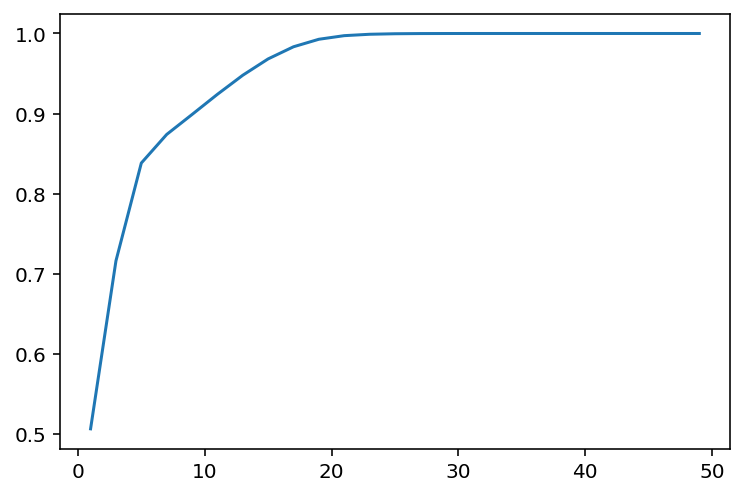

In [40]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

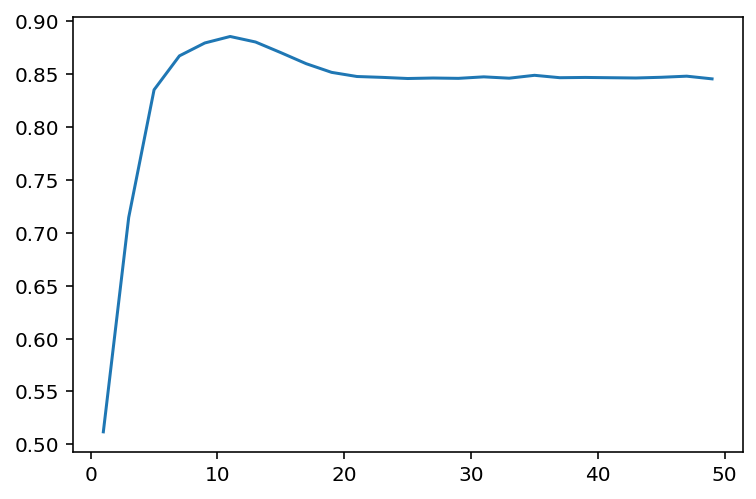

In [41]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [42]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 48.525115383431945
median_absolute_error: 0.8904186804416244
r2_score: 0.869185719078307


### Случайный лес

In [43]:
#Cписок настраиваемых параметров
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

In [44]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

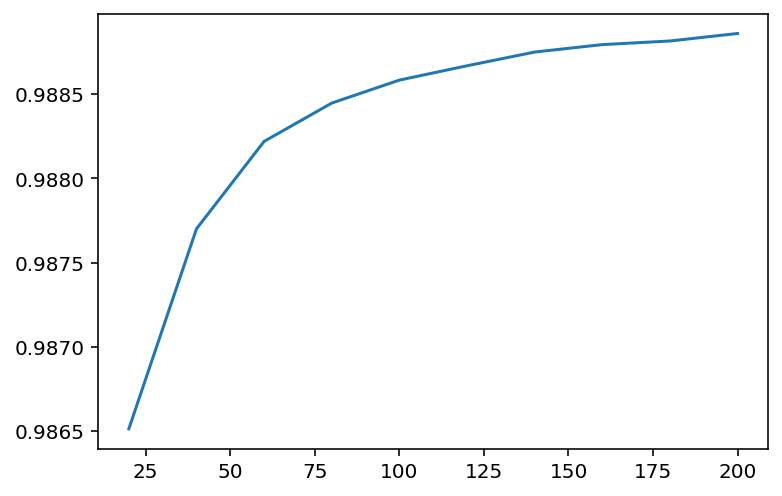

In [45]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

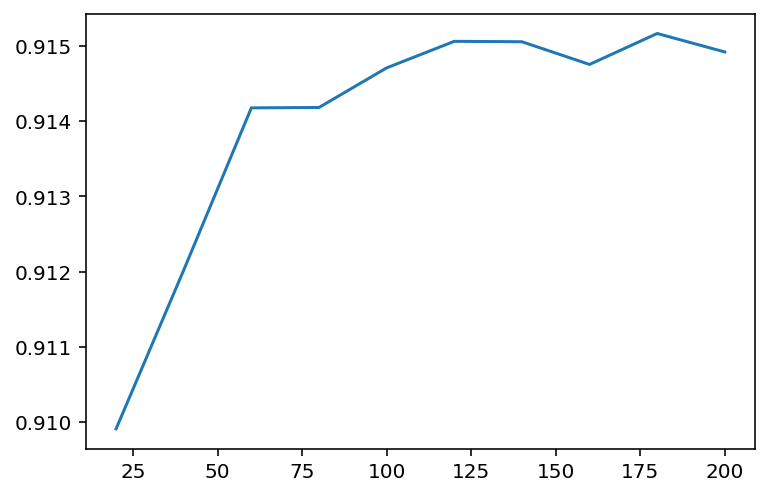

In [46]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [47]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 37.82005191167673
median_absolute_error: 0.6110833333333303
r2_score: 0.9162422360120536
